In [1]:
%pylab inline

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128
rcParams["animation.codec"] = 'h264' 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Functions for plotting

https://matplotlib.org/3.1.0/gallery/statistics/confidence_ellipse.html

In [2]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

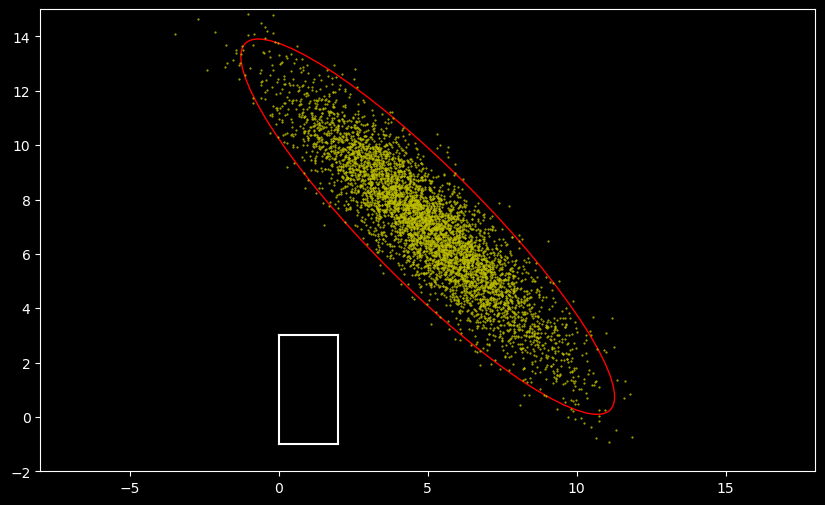

In [3]:
def plot_gaussian_ellipse2(mean, cov, ax, n_std=2.82, **kwargs):
    mean_x, mean_y = mean
    cov = np.array(cov)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    
    
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


# plot rectangle
def plot_rectangle(x,y, width, height, ax, color='w'):
    xx = [x - width/2., x + width/2., x + width/2., x - width/2., x - width/2.]
    yy = [y - height/2., y - height/2., y + height/2., y + height/2., y - height/2.]
    
    for i in range(1, len(xx)):
        plot([xx[i-1], xx[i]], [yy[i-1], yy[i]], color=color)
        

def get_axis(x1=-8, x2=18, y1=-2, y2=15):
    ax1 = plt.axes()
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(y1, y2)
    return ax1


mean = [5, 7]
cov = [[1,0], [0,1]]
cov = [[ 4.94072998, -4.93536067],
       [-4.93536067,  5.99552455]]


x, y = np.random.multivariate_normal(mean, cov, 5000).T


ax1 = get_axis()
ax1.plot(x, y, 'y.', markersize=1)
plot_gaussian_ellipse2(mean, cov, ax1, edgecolor='red', facecolor='None')
plot_rectangle(1,1, 2, 4, ax1)  # Test plot rectangle


-0.7437257494197902 -0.6684848611972984 131.95023309937415


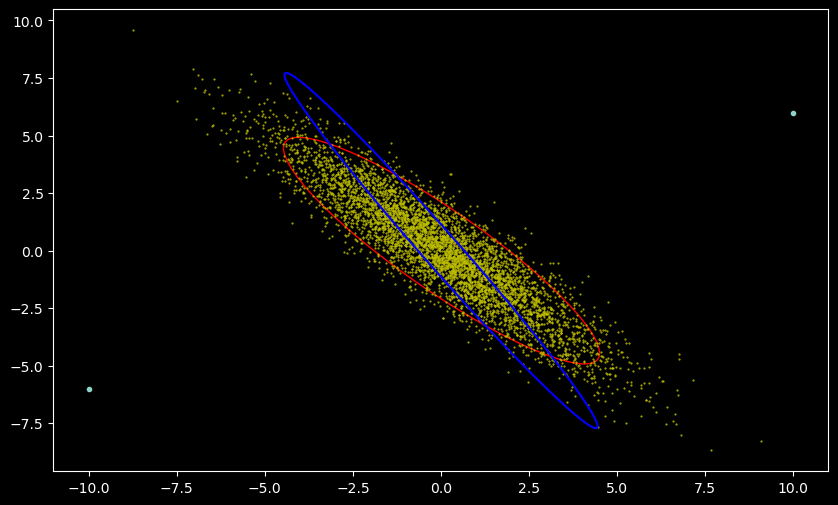

In [4]:
def plot_gaussian_ellipse(mean, covar, color='none', n_std=2):
    # Get eigenvalues and eigenvectors
    v, w = linalg.eigh(covar)    
    # scale the eigenvalues to be the x and y axis of the ellipse
    v = 2. * np.sqrt(v)
    # Unit vector of the x-axis of the ellipse.
    ux, uy = w[0] / linalg.norm(w[0])

    # Orientation of the ellipse
    angle = np.arctan(uy / ux)
    angle = degrees(angle) +90  # convert to degrees   
    print (ux, uy, angle)
    
    t = np.linspace(0,2*pi,100)
    # Ellipse
#     X = np.dot(v, [np.cos(t), np.sin(t)])
#     X = np.dot(np.array([v[0], v[1]]).T, [[np.cos(t)], [np.sin(t)]])
#     print(X.shape)
    x, y = v[0] * np.cos(t), v[1] * np.sin(t)
    # Rotation matrix
    R = np.array([[ux, -uy], [uy, ux]])
    
    x = R[0,0] * x + R[0,1] * y
    y = R[1,0] * x + R[1,1] * y
#     # Rotated ellipse
#     x,y = np.dot(R, X)
#     x = v[0] * np.cos(t), v[1] * np.sin(t)
#     y = 
    plot(x,y, 'b')


mean = [0, 0]
cov = [[1,0], [0,1]]
cov = [[ 4.94072998, -4.93536067],
       [-4.93536067,  5.99552455]]

ax1 = plt.axes()
ax1.plot([-10,10],[-6,6],'.')


x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'y.', markersize=1)

plot_gaussian_ellipse(mean, cov, color='red')

confidence_ellipse(x, y, ax1, edgecolor='red')


# Localization

## Motion model

$$
P(x_t| x_{t-1}, u_{t-1})
$$

$$x_t =  x_{t-1} + \Delta t\: u_{t-1} + \epsilon$$

https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

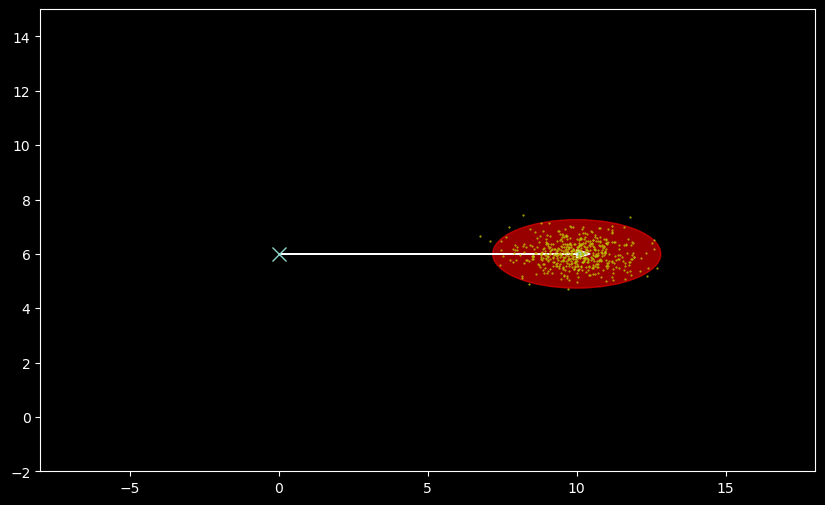

In [5]:
# Initial location at t-1
x = [0, 6]  # Initial location
u = [10, 0]  # Control inputs
motion_cov = [[1,0], [0,.2]]  # covariance


################### Plot results
ax1 = get_axis()


plot(x[0],x[1], 'x', markersize=10)
plt.arrow(x[0], x[1], u[0], u[1], head_width=0.3)

mean = x + np.array(u)
plot_gaussian_ellipse2(mean, motion_cov, ax1, color='red', alpha=0.6)

x, y = np.random.multivariate_normal(mean, motion_cov, 500).T
plt.plot(x, y, 'y.', markersize=1)

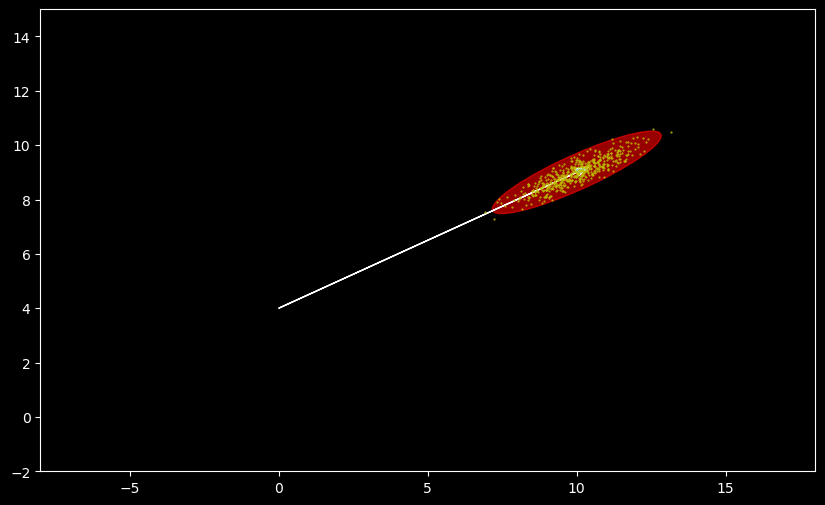

In [6]:
# Probability model of the motion
def prob_motion(x, u, motion_cov):
    u = np.array(u)
    mean = x + u
    # Normalize the control input
    magnitud = np.linalg.norm(u)    
    ux, uy = u / magnitud 
    # Rotation matrix
    R = np.array([[ux, -uy], [uy, ux]])    
    v, w = linalg.eigh(motion_cov)  
    S = np.array([[v[1], 0], [0, v[0]]])
    # Scale linearly with the magnitud    
    S = 0.1*magnitud * S    
    cov = dot(dot(dot(R, S), S), R.T)    
    return mean, cov



x = [0, 4]
# Control inputs
u = [10, 5]
# motion_cov = [[.1,0], [0,.02]]  # covariance
    
# Plot
ax1 = get_axis()
plt.arrow(x[0], x[1], u[0], u[1], head_width=0.3)

mean, cov = prob_motion(x, u, motion_cov)
# print (cov)
plot_gaussian_ellipse2(mean, cov, ax1, color='red', alpha=0.6)

# Samples
x, y = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x, y, 'y.', markersize=1)


# Accumulative error

(10, 0) 1.01 1
(0, 5) 1.02 1
(-11, 0) 2.2300000000000004 1
(7, 7) 2.7396000000000003 1


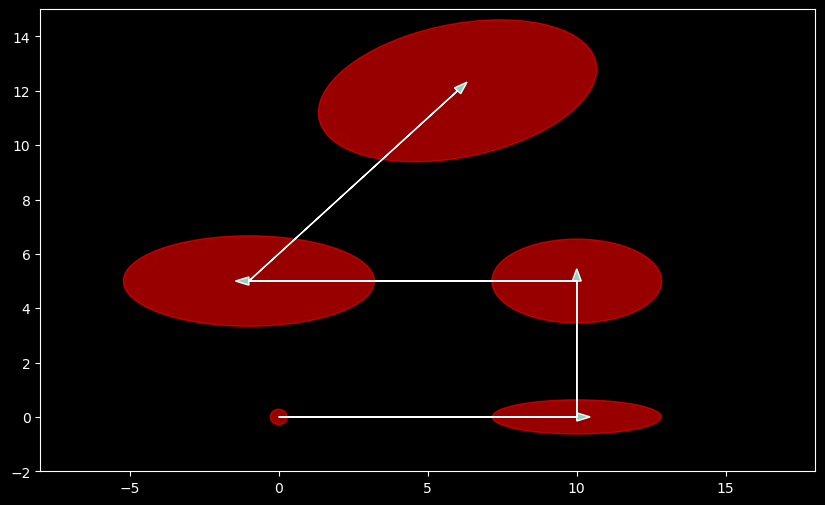

In [7]:
x0 = [0,0]
U = [(10,0), (0,5), (-11,0), (7,7)]
 

# Initial belief
mean = x0
cov = np.array([[.01,0], [0,.01]])



# Initial gaussian
ax1 = get_axis()
plot_gaussian_ellipse2(mean, cov, ax1, color='red', alpha=0.6)


for u in U:        
    # Plot control input
    plt.arrow(mean[0], mean[1], u[0], u[1], head_width=0.3)
    
    # Update the belief based on motion model
    mean, cov_t = prob_motion(mean, u, motion_cov)
    
    
    cov += cov_t
    print(u, cov[0,0], motion_cov[0][0])
    # Plot 
    plot_gaussian_ellipse2(mean, cov, ax1, color='red', alpha=0.6)

    # Samples
#     x, y = np.random.multivariate_normal(mean, cov, 500).T
#     plt.plot(x, y, 'y.', markersize=1)


# Perception model

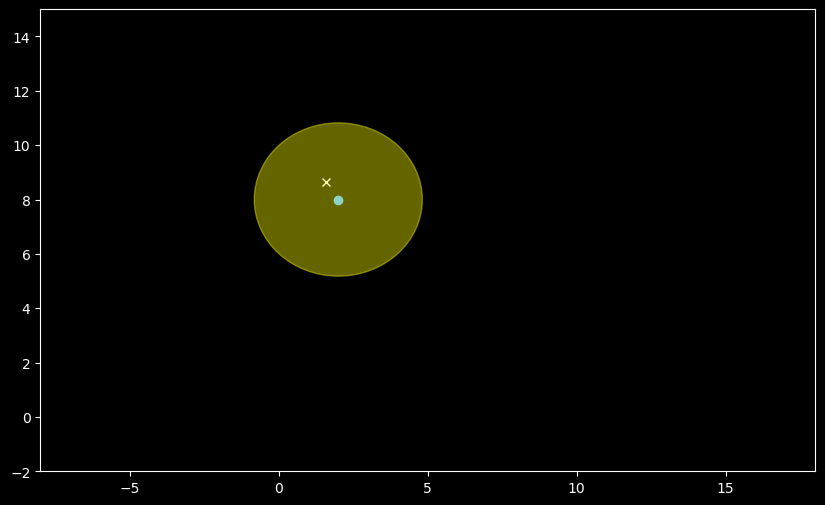

In [8]:
# Initial location
x = [2, 8]

# Covariance of the error
Q = [[1,0],[0,1]]

# Measurement
z = x + np.random.multivariate_normal([0,0], Q)



ax1 = plt.axes()
ax1.set_xlim(-8, 18)
ax1.set_ylim(-2, 15)

plot(x[0], x[1], 'o')
plot(z[0], z[1], 'x')

# Plot measurement eror
plot_gaussian_ellipse2(x, Q, ax1, color='yellow', alpha=0.4)



# Kalman Filter

0.01
(5, 0) 0.26 1
0.26
(0, 5) 0.27 1
0.27
(-9, -2) 1.0816000000000003 1
1.0816000000000003
(7, 7) 1.5912000000000004 1


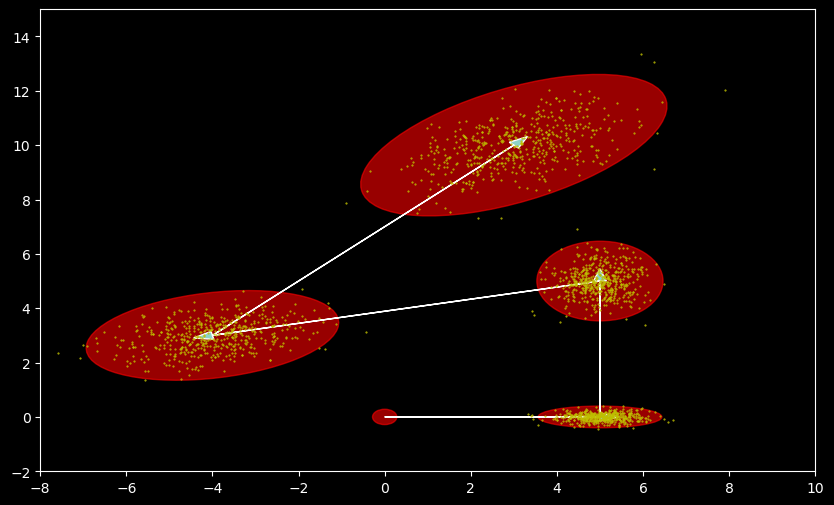

In [9]:
x0 = [0,0]
U = [(5,0), (0,5), (-9,-2), (7,7)]
 

# Initial belief
mean = x0
cov = np.array([[.01,0], [0,.01]])

ax1 = plt.axes()
ax1.set_xlim(-8,10)
ax1.set_ylim(-2, 15)

# Initial gaussian
plot_gaussian_ellipse2(mean, cov, ax1, color='red', alpha=0.6)


for u in U:        
    # Motion
    plt.arrow(mean[0], mean[1], u[0], u[1], head_width=0.3)
    
    # Update the belief
    mean, cov_t = prob_motion(mean, u, motion_cov)
    print(cov[0,0])
    cov += cov_t
    print(u, cov[0,0], motion_cov[0][0])
    # Plot 
    plot_gaussian_ellipse2(mean, cov, ax1, color='red', alpha=0.6)

    # Samples
    x, y = np.random.multivariate_normal(mean, cov, 500).T
    plt.plot(x, y, 'y.', markersize=1)

In [10]:

dest = np.array([6,6])
destun = .5

vel = np.array([0,0])

(dest-np.array(vel))/sum((dest-np.array(vel))**2)**.5
np.linalg.norm(dest-np.array(vel))  

8.48528137423857

[[0.32757817 0.26425857]
 [0.26425857 0.32757817]]
[[0.46692775 0.31326676]
 [0.31326676 0.46715895]]
[[0.66655952 0.2653386 ]
 [0.2653386  0.66660937]]
[[0.84628348 0.13496422]
 [0.13496422 0.84642036]]
[[0.95581407 0.04018496]
 [0.04018496 0.95599812]]
[[0.99088405 0.00838405]
 [0.00838405 0.99090214]]
[[0.99834939 0.0015218 ]
 [0.0015218  0.99835178]]
[[9.99712265e-01 2.65488535e-04]
 [2.65488555e-04 9.99712461e-01]]
[[9.99950377e-01 4.57992928e-05]
 [4.57992002e-05 9.99950390e-01]]
[[9.99991470e-01 7.87220242e-06]
 [7.87294962e-06 9.99991472e-01]]


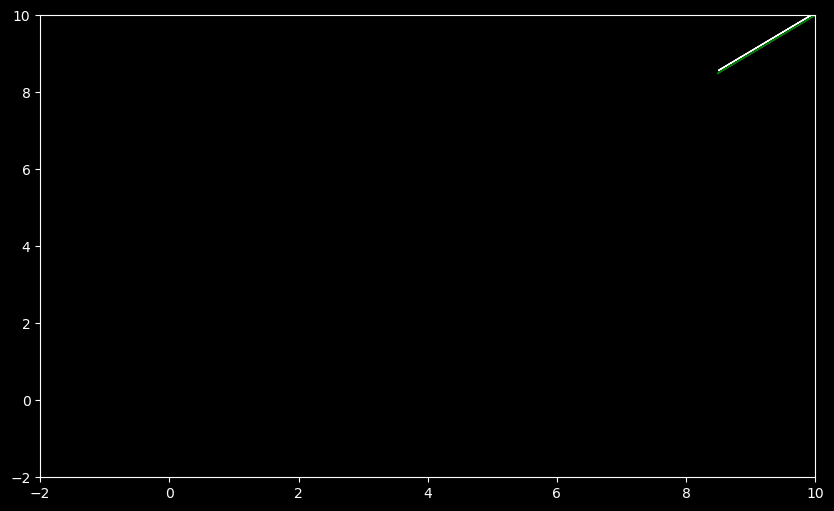

In [19]:
import numpy as np

# Probability model of the motion
def prob_motion2(x, u, motion_cov):
    u = np.array(u)
    mean = x + u
    # Normalize the control input
    magnitud = np.linalg.norm(u)    
    ux, uy = u / magnitud 
    # Rotation matrix
    R = np.array([[ux, -uy], [uy, ux]])    
    v, w = linalg.eigh(motion_cov)  
    S = np.array([[v[1], 0], [0, v[0]]])
    # Scale linearly with the magnitud    
    S = 0.1*magnitud * S    
    cov = dot(dot(dot(R, S), S), R.T)    
    return mean, cov

ax1 = plt.axes()
ax1.set_xlim(-2, 10)
ax1.set_ylim(-2, 10)

timestep = 1
imagestep = 1 # +- .5
xmaxvel = 1
xunvel = (.7 + .4 * np.random.rand()) #random uncertainty in the velocity
windvel = (-.05  + .1*np.random.rand(),-.05+ .1*np.random.rand())
yawunvel = .1
yawmaxvel = np.pi/10
motion_cov = [[1,0], [0,.2]]  # covariance

Q = [[1,0],[0,1]] #covariance of the error

dest = np.array([6,6])
destun = .5

vel = [0,0]
mean = [0,0]
actual = [0,0]
yaw = 0
cov = np.array([[.01,0], [0,.01]])
times = 0
lastmeasured = 0
try:
    while np.linalg.norm(dest-np.array(actual)) > destun and times < 10:
        prediction = xmaxvel * np.linalg.norm(dest-np.array(mean))
        movement = xunvel * prediction + windvel + (-.05  + .1*np.random.rand(),-.05+ .1*np.random.rand())
        actual += movement*timestep
        u = mean+prediction*timestep
        mean, cov_t = prob_motion2(mean, u, motion_cov)
        cov += cov_t
        plt.arrow(mean[0], mean[1], u[0], u[1], head_width=1, head_length = 1, color = "green")
        plt.arrow(actual[0], actual[1], u[0], u[1], head_width=1, head_length = 1)
        
        if times%1 == 0:
            #take a measurement
            z = actual + (-.1  + .2*np.random.rand(),-.1+ .2*np.random.rand())
            K = np.dot(cov, np.linalg.inv(cov + Q))
            mean = mean + np.dot(K, z-mean)
            cov = np.dot(np.identity(2)-K, cov)
        print(cov)
        print

        times += timestep
    plt.show()
    
except:
    pass